# Students Social Media Addiction - Data Preprocessing

This notebook contains the data preprocessing steps for the Students Social Media Addiction dataset. The preprocessing includes:

1. **Data Loading & Exploration** - Load the dataset and understand its structure
2. **Missing Values Handling** - Check and handle any missing values
3. **Categorical Data Encoding** - Convert categorical variables to numerical format
4. **Feature Normalization** - Scale numerical features to similar ranges
5. **Feature Engineering** - Create new features to improve model performance

The goal is to prepare a clean, well-structured dataset for machine learning analysis.

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plot style
plt.style.use('default')
sns.set_palette("husl")

## 1. Load Dataset

In [15]:
# Load the dataset
df = pd.read_csv('dataset/Students_Social_Media_Addiction.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Display column names
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (705, 13)

DATASET OVERVIEW

First 5 rows:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   M

In [16]:
# Basic statistics for numerical columns
print("BASIC STATISTICS")
print("="*50)
print(df.describe())

print("\n" + "="*50)
print("UNIQUE VALUES PER COLUMN")
print("="*50)

# Check unique values for each column
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    
    # Show unique values for categorical columns with reasonable number of unique values
    if df[col].dtype == 'object' and unique_count <= 20:
        print(f"  Values: {df[col].unique()}")
    print()

BASIC STATISTICS
       Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std               1.105055                     0.

## 2. Handle Missing Values

In [17]:
# Check for missing values
print("MISSING VALUES ANALYSIS")
print("="*50)

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing values percentage:")
for col, percentage in missing_percentage.items():
    if percentage > 0:
        print(f"{col}: {percentage:.2f}%")
    
if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset!")
else:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")

MISSING VALUES ANALYSIS
Missing values per column:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Missing values percentage:

✅ No missing values found in the dataset!


In [18]:
# Since we found no missing values, we'll create a copy for processing
df_processed = df.copy()

# If there were missing values, we would handle them like this:
# For numerical columns: fill with median or mean
# For categorical columns: fill with mode or create 'Unknown' category

# Example handling (not needed for this dataset but shown for reference):
# df_processed['Avg_Daily_Usage_Hours'].fillna(df_processed['Avg_Daily_Usage_Hours'].median(), inplace=True)
# df_processed['Gender'].fillna(df_processed['Gender'].mode()[0], inplace=True)

print("✅ Dataset ready for further processing!")
print(f"Processed dataset shape: {df_processed.shape}")

✅ Dataset ready for further processing!
Processed dataset shape: (705, 13)


## 3. Convert Categorical Data to Numerical

In [19]:
# Identify categorical columns
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns identified:")
print(categorical_columns)

# Remove Student_ID if it exists (it's an identifier, not a feature)
if 'Student_ID' in df_processed.columns:
    print("\nRemoving Student_ID as it's an identifier, not a feature...")
    df_processed = df_processed.drop('Student_ID', axis=1)
    
print(f"\nDataset shape after removing ID: {df_processed.shape}")

# Display unique values for each categorical column
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    if col in df_processed.columns:
        print(f"\n{col}: {df_processed[col].unique()}")

Categorical columns identified:
['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']

Removing Student_ID as it's an identifier, not a feature...

Dataset shape after removing ID: (705, 12)

Unique values in categorical columns:

Gender: ['Female' 'Male']

Academic_Level: ['Undergraduate' 'Graduate' 'High School']

Country: ['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland

In [20]:
# Create a copy for encoding
df_encoded = df_processed.copy()

# Binary encoding for Gender (Label Encoding)
if 'Gender' in df_encoded.columns:
    le_gender = LabelEncoder()
    df_encoded['Gender_Encoded'] = le_gender.fit_transform(df_encoded['Gender'])
    print("Gender encoding:")
    gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
    print(gender_mapping)

# Binary encoding for Affects_Academic_Performance
if 'Affects_Academic_Performance' in df_encoded.columns:
    le_performance = LabelEncoder()
    df_encoded['Affects_Academic_Performance_Encoded'] = le_performance.fit_transform(df_encoded['Affects_Academic_Performance'])
    print("\nAffects Academic Performance encoding:")
    performance_mapping = dict(zip(le_performance.classes_, le_performance.transform(le_performance.classes_)))
    print(performance_mapping)

# One-Hot Encoding for Academic_Level (ordinal but we'll treat as categorical)
if 'Academic_Level' in df_encoded.columns:
    academic_dummies = pd.get_dummies(df_encoded['Academic_Level'], prefix='Academic_Level')
    df_encoded = pd.concat([df_encoded, academic_dummies], axis=1)
    print(f"\nAcademic Level one-hot encoded columns: {academic_dummies.columns.tolist()}")

# One-Hot Encoding for Relationship_Status
if 'Relationship_Status' in df_encoded.columns:
    relationship_dummies = pd.get_dummies(df_encoded['Relationship_Status'], prefix='Relationship_Status')
    df_encoded = pd.concat([df_encoded, relationship_dummies], axis=1)
    print(f"Relationship Status one-hot encoded columns: {relationship_dummies.columns.tolist()}")

print(f"\nDataset shape after encoding: {df_encoded.shape}")

Gender encoding:
{'Female': 0, 'Male': 1}

Affects Academic Performance encoding:
{'No': 0, 'Yes': 1}

Academic Level one-hot encoded columns: ['Academic_Level_Graduate', 'Academic_Level_High School', 'Academic_Level_Undergraduate']
Relationship Status one-hot encoded columns: ['Relationship_Status_Complicated', 'Relationship_Status_In Relationship', 'Relationship_Status_Single']

Dataset shape after encoding: (705, 20)


In [21]:
# Handle Most_Used_Platform with One-Hot Encoding (manageable number of categories)
if 'Most_Used_Platform' in df_encoded.columns:
    platform_dummies = pd.get_dummies(df_encoded['Most_Used_Platform'], prefix='Platform')
    df_encoded = pd.concat([df_encoded, platform_dummies], axis=1)
    print(f"Most Used Platform one-hot encoded columns: {platform_dummies.columns.tolist()}")

# Handle Country with frequency encoding (too many categories for one-hot)
if 'Country' in df_encoded.columns:
    # Frequency encoding for Country
    country_freq = df_encoded['Country'].value_counts().to_dict()
    df_encoded['Country_Frequency'] = df_encoded['Country'].map(country_freq)
    
    # Alternative: Group less frequent countries
    country_counts = df_encoded['Country'].value_counts()
    frequent_countries = country_counts[country_counts >= 5].index.tolist()  # Countries with 5+ occurrences
    
    df_encoded['Country_Grouped'] = df_encoded['Country'].apply(
        lambda x: x if x in frequent_countries else 'Other'
    )
    
    # One-hot encode the grouped countries
    country_grouped_dummies = pd.get_dummies(df_encoded['Country_Grouped'], prefix='Country')
    df_encoded = pd.concat([df_encoded, country_grouped_dummies], axis=1)
    
    print(f"\nCountry frequency encoding applied.")
    print(f"Frequent countries (>=5 occurrences): {len(frequent_countries)}")
    print(f"Country grouped one-hot encoded columns: {country_grouped_dummies.columns.tolist()[:10]}...")  # Show first 10

print(f"\nFinal dataset shape after all encoding: {df_encoded.shape}")

Most Used Platform one-hot encoded columns: ['Platform_Facebook', 'Platform_Instagram', 'Platform_KakaoTalk', 'Platform_LINE', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_TikTok', 'Platform_Twitter', 'Platform_VKontakte', 'Platform_WeChat', 'Platform_WhatsApp', 'Platform_YouTube']

Country frequency encoding applied.
Frequent countries (>=5 occurrences): 31
Country grouped one-hot encoded columns: ['Country_Australia', 'Country_Bangladesh', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Denmark', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_India']...

Final dataset shape after all encoding: (705, 66)


In [22]:
# Create final dataset with only numerical features
original_categorical_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 
                           'Affects_Academic_Performance', 'Relationship_Status', 'Country_Grouped']

# Drop original categorical columns (keep only encoded versions)
columns_to_drop = [col for col in original_categorical_cols if col in df_encoded.columns]
df_final = df_encoded.drop(columns=columns_to_drop)

print("FINAL ENCODED DATASET")
print("="*50)
print(f"Shape: {df_final.shape}")
print(f"\nColumns in final dataset:")
for i, col in enumerate(df_final.columns, 1):
    print(f"{i:2d}. {col}")

# Check data types
print(f"\nData types:")
print(df_final.dtypes.value_counts())

# Display first few rows of final dataset
print(f"\nFirst 3 rows of final encoded dataset:")
print(df_final.head(3))

FINAL ENCODED DATASET
Shape: (705, 59)

Columns in final dataset:
 1. Age
 2. Avg_Daily_Usage_Hours
 3. Sleep_Hours_Per_Night
 4. Mental_Health_Score
 5. Conflicts_Over_Social_Media
 6. Addicted_Score
 7. Gender_Encoded
 8. Affects_Academic_Performance_Encoded
 9. Academic_Level_Graduate
10. Academic_Level_High School
11. Academic_Level_Undergraduate
12. Relationship_Status_Complicated
13. Relationship_Status_In Relationship
14. Relationship_Status_Single
15. Platform_Facebook
16. Platform_Instagram
17. Platform_KakaoTalk
18. Platform_LINE
19. Platform_LinkedIn
20. Platform_Snapchat
21. Platform_TikTok
22. Platform_Twitter
23. Platform_VKontakte
24. Platform_WeChat
25. Platform_WhatsApp
26. Platform_YouTube
27. Country_Frequency
28. Country_Australia
29. Country_Bangladesh
30. Country_Brazil
31. Country_Canada
32. Country_China
33. Country_Denmark
34. Country_Finland
35. Country_France
36. Country_Germany
37. Country_India
38. Country_Ireland
39. Country_Italy
40. Country_Japan
41. Cou

## 4. Split Data and Normalize Numerical Features

**Important**: We split the data before scaling to prevent data leakage. This ensures that the scaler is fitted only on the training data and then applied to both training and test sets.

In [23]:
# First, let's define our features (X) and target (y)
# Assuming 'Addicted_Score' is our target variable
X = df_final.drop('Addicted_Score', axis=1)
y = df_final['Addicted_Score']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"\nAfter splitting:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Identify numerical columns that need scaling (exclude binary encoded columns)
numerical_cols_to_scale = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                          'Mental_Health_Score', 'Conflicts_Over_Social_Media',
                          'Country_Frequency']

# Filter to only include columns that exist in our dataset
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col in X_train.columns]

print(f"\nNumerical columns to be scaled:")
print(numerical_cols_to_scale)

# Display statistics before scaling (training data only)
print(f"\nStatistics BEFORE scaling (Training Data):")
print(X_train[numerical_cols_to_scale].describe())

# Apply StandardScaler - FIT ONLY ON TRAINING DATA
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit the scaler on training data only and transform training data
X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])

# Transform test data using the scaler fitted on training data
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# Display statistics after scaling
print(f"\nStatistics AFTER scaling (Training Data):")
print(X_train_scaled[numerical_cols_to_scale].describe())

print(f"\nStatistics AFTER scaling (Test Data):")
print(X_test_scaled[numerical_cols_to_scale].describe())

# Combine back into full datasets for compatibility with existing code
df_scaled = pd.concat([X_train_scaled, X_test_scaled]).sort_index()
df_scaled['Addicted_Score'] = y

print(f"\n✅ Data properly split and scaled without data leakage!")
print(f"Final scaled dataset shape: {df_scaled.shape}")

Features shape: (705, 58)
Target shape: (705,)

After splitting:
Training set: 564 samples
Test set: 141 samples

Numerical columns to be scaled:
['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Country_Frequency']

Statistics BEFORE scaling (Training Data):
              Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  564.000000             564.000000             564.000000   
mean    20.668440               4.937411               6.864894   
std      1.389505               1.285236               1.148715   
min     18.000000               2.000000               3.800000   
25%     20.000000               4.100000               6.000000   
50%     21.000000               4.800000               6.850000   
75%     22.000000               5.800000               7.700000   
max     24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Country_Frequenc

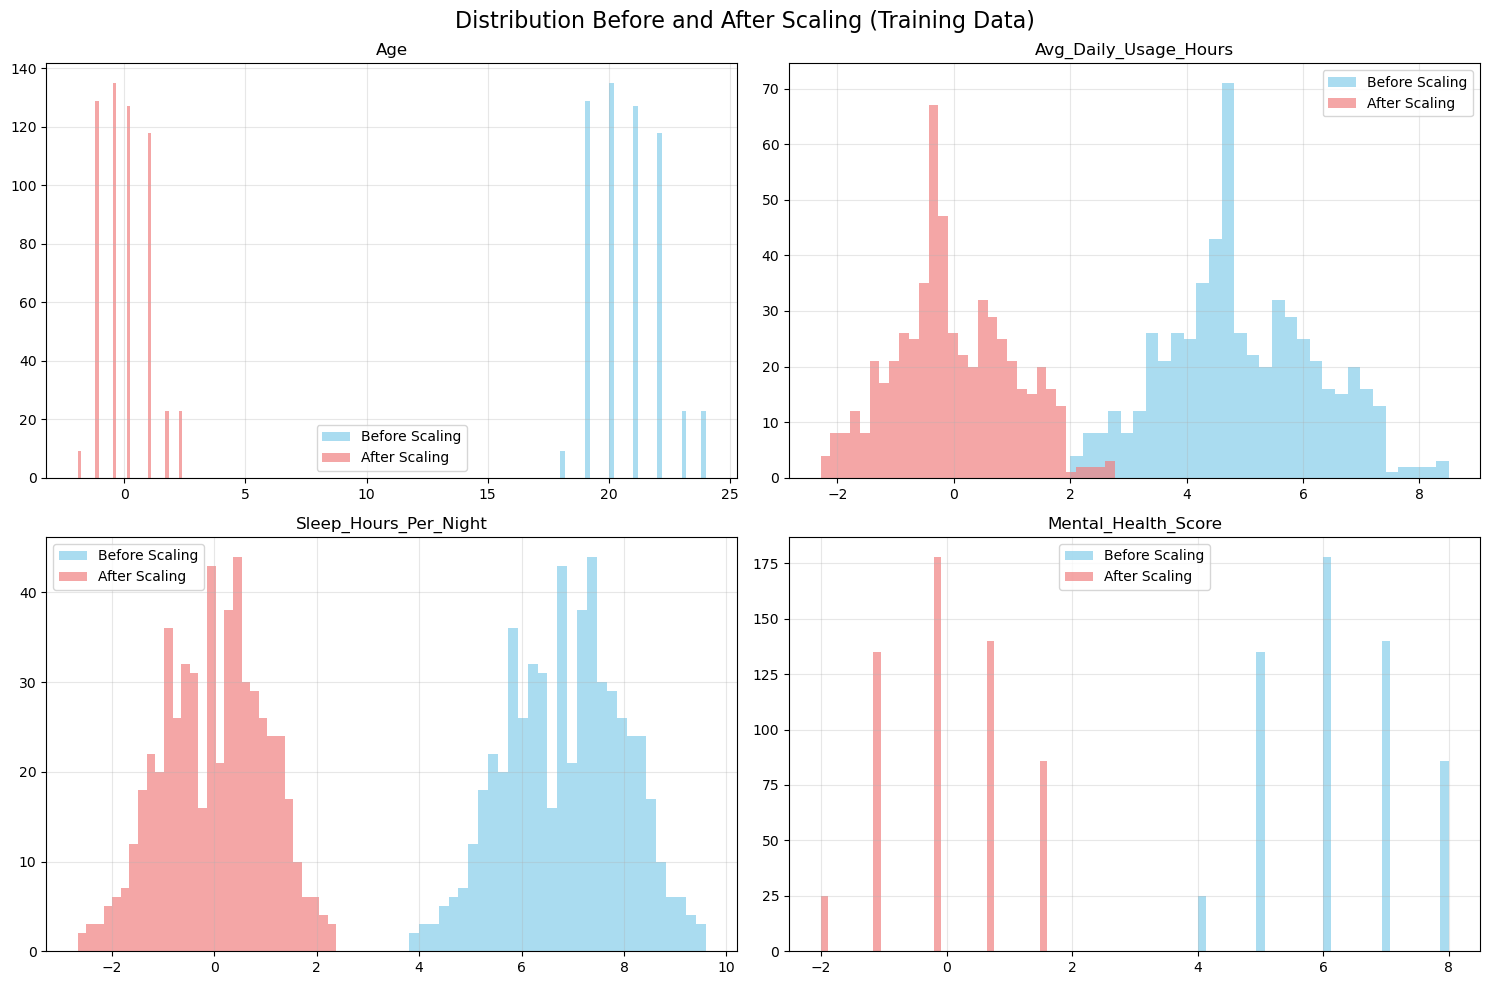


Creating combined datasets:
Combined training set: Features + Target
Combined test set: Features + Target

Combined datasets created:
Training data shape: (564, 59)
Test data shape: (141, 59)


In [24]:
# Visualize the effect of scaling on training data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Before and After Scaling (Training Data)', fontsize=16)

# Select first 4 numerical columns for visualization
vis_cols = numerical_cols_to_scale[:4] if len(numerical_cols_to_scale) >= 4 else numerical_cols_to_scale

for i, col in enumerate(vis_cols):
    if i < 4:  # Only plot first 4
        row, col_idx = i // 2, i % 2
        
        # Before scaling (training data)
        axes[row, col_idx].hist(X_train[col], bins=30, alpha=0.7, label='Before Scaling', color='skyblue')
        # After scaling (training data)
        axes[row, col_idx].hist(X_train_scaled[col], bins=30, alpha=0.7, label='After Scaling', color='lightcoral')
        
        axes[row, col_idx].set_title(f'{col}')
        axes[row, col_idx].legend()
        axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create combined datasets for easier use
print(f"\nCreating combined datasets:")
print(f"Combined training set: Features + Target")
train_data = X_train_scaled.copy()
train_data['Addicted_Score'] = y_train

print(f"Combined test set: Features + Target")
test_data = X_test_scaled.copy()
test_data['Addicted_Score'] = y_test

print(f"\nCombined datasets created:")
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

## 5. Feature Engineering

In [25]:
# Create feature-engineered dataset using the combined training data
df_engineered = train_data.copy()

# Add test data for feature engineering (but keep separate scaling)
df_test_engineered = test_data.copy()

# 1. Usage Intensity Categories
if 'Avg_Daily_Usage_Hours' in train_data.columns:
    # Use training data to define bins and apply to both sets
    train_usage_orig = X_train['Avg_Daily_Usage_Hours']  # Original unscaled values
    test_usage_orig = X_test['Avg_Daily_Usage_Hours']    # Original unscaled values
    
    df_engineered['Usage_Category'] = pd.cut(train_usage_orig, 
                                            bins=[0, 2, 4, 6, float('inf')], 
                                            labels=['Low', 'Medium', 'High', 'Very High'])
    df_test_engineered['Usage_Category'] = pd.cut(test_usage_orig, 
                                                 bins=[0, 2, 4, 6, float('inf')], 
                                                 labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Convert to numerical
    usage_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
    df_engineered['Usage_Category_Encoded'] = df_engineered['Usage_Category'].map(usage_mapping)
    df_test_engineered['Usage_Category_Encoded'] = df_test_engineered['Usage_Category'].map(usage_mapping)

# 2. Sleep Quality Indicator
if 'Sleep_Hours_Per_Night' in train_data.columns:
    # Use original unscaled values for meaningful thresholds
    train_sleep_orig = X_train['Sleep_Hours_Per_Night']
    test_sleep_orig = X_test['Sleep_Hours_Per_Night']
    
    # WHO recommends 7-9 hours for adults
    df_engineered['Adequate_Sleep'] = ((train_sleep_orig >= 7) & (train_sleep_orig <= 9)).astype(int)
    df_test_engineered['Adequate_Sleep'] = ((test_sleep_orig >= 7) & (test_sleep_orig <= 9)).astype(int)

# 3. Mental Health Risk Level
if 'Mental_Health_Score' in train_data.columns:
    # Use original unscaled values
    train_mental_orig = X_train['Mental_Health_Score']
    test_mental_orig = X_test['Mental_Health_Score']
    
    df_engineered['Mental_Health_Risk'] = pd.cut(train_mental_orig, 
                                                bins=[0, 4, 6, 8, float('inf')], 
                                                labels=['High Risk', 'Medium Risk', 'Low Risk', 'Very Low Risk'])
    df_test_engineered['Mental_Health_Risk'] = pd.cut(test_mental_orig, 
                                                     bins=[0, 4, 6, 8, float('inf')], 
                                                     labels=['High Risk', 'Medium Risk', 'Low Risk', 'Very Low Risk'])
    
    # Convert to numerical (reversed so higher number = lower risk)
    risk_mapping = {'High Risk': 0, 'Medium Risk': 1, 'Low Risk': 2, 'Very Low Risk': 3}
    df_engineered['Mental_Health_Risk_Encoded'] = df_engineered['Mental_Health_Risk'].map(risk_mapping)
    df_test_engineered['Mental_Health_Risk_Encoded'] = df_test_engineered['Mental_Health_Risk'].map(risk_mapping)

# 4. Social Media Impact Score (combination of usage and academic performance)
if 'Avg_Daily_Usage_Hours' in X_train.columns and 'Affects_Academic_Performance_Encoded' in X_train.columns:
    # Use original values for normalization
    train_usage_orig = X_train['Avg_Daily_Usage_Hours']
    test_usage_orig = X_test['Avg_Daily_Usage_Hours']
    
    # Normalize based on training data statistics
    usage_min = train_usage_orig.min()
    usage_max = train_usage_orig.max()
    
    train_usage_normalized = (train_usage_orig - usage_min) / (usage_max - usage_min)
    test_usage_normalized = (test_usage_orig - usage_min) / (usage_max - usage_min)
    
    df_engineered['SM_Impact_Score'] = train_usage_normalized * X_train['Affects_Academic_Performance_Encoded'].values
    df_test_engineered['SM_Impact_Score'] = test_usage_normalized * X_test['Affects_Academic_Performance_Encoded'].values

# 5. Lifestyle Balance Score
if 'Sleep_Hours_Per_Night' in X_train.columns and 'Avg_Daily_Usage_Hours' in X_train.columns:
    # Use original values and training data statistics for normalization
    train_sleep_orig = X_train['Sleep_Hours_Per_Night']
    train_usage_orig = X_train['Avg_Daily_Usage_Hours']
    test_sleep_orig = X_test['Sleep_Hours_Per_Night']
    test_usage_orig = X_test['Avg_Daily_Usage_Hours']
    
    # Normalize based on training data
    sleep_min, sleep_max = train_sleep_orig.min(), train_sleep_orig.max()
    usage_min, usage_max = train_usage_orig.min(), train_usage_orig.max()
    
    train_sleep_normalized = (train_sleep_orig - sleep_min) / (sleep_max - sleep_min)
    train_usage_normalized = (train_usage_orig - usage_min) / (usage_max - usage_min)
    test_sleep_normalized = (test_sleep_orig - sleep_min) / (sleep_max - sleep_min)
    test_usage_normalized = (test_usage_orig - usage_min) / (usage_max - usage_min)
    
    df_engineered['Lifestyle_Balance'] = train_sleep_normalized - train_usage_normalized
    df_test_engineered['Lifestyle_Balance'] = test_sleep_normalized - test_usage_normalized

print("NEW FEATURES CREATED:")
print("="*50)
print("1. Usage_Category_Encoded: Categorized daily usage (0=Low, 1=Medium, 2=High, 3=Very High)")
print("2. Adequate_Sleep: Binary indicator for adequate sleep (7-9 hours)")
print("3. Mental_Health_Risk_Encoded: Risk level based on mental health score")
print("4. SM_Impact_Score: Combined social media usage and academic impact")
print("5. Lifestyle_Balance: Balance between sleep and social media usage")

print(f"\nTraining dataset shape after feature engineering: {df_engineered.shape}")
print(f"Test dataset shape after feature engineering: {df_test_engineered.shape}")

NEW FEATURES CREATED:
1. Usage_Category_Encoded: Categorized daily usage (0=Low, 1=Medium, 2=High, 3=Very High)
2. Adequate_Sleep: Binary indicator for adequate sleep (7-9 hours)
3. Mental_Health_Risk_Encoded: Risk level based on mental health score
4. SM_Impact_Score: Combined social media usage and academic impact
5. Lifestyle_Balance: Balance between sleep and social media usage

Training dataset shape after feature engineering: (564, 66)
Test dataset shape after feature engineering: (141, 66)


In [26]:
# Drop temporary categorical columns created during feature engineering
temp_cols_to_drop = ['Usage_Category', 'Mental_Health_Risk']

# Clean training data
columns_to_drop = [col for col in temp_cols_to_drop if col in df_engineered.columns]
df_engineered = df_engineered.drop(columns=columns_to_drop)

# Clean test data
columns_to_drop_test = [col for col in temp_cols_to_drop if col in df_test_engineered.columns]
df_test_engineered = df_test_engineered.drop(columns=columns_to_drop_test)

# Combine back into single dataset for saving (but keep track that data was properly split)
df_final_preprocessed = pd.concat([df_engineered, df_test_engineered], axis=0, ignore_index=True)

# Final dataset overview
print("FINAL PREPROCESSED DATASET")
print("="*60)
print(f"Combined shape: {df_final_preprocessed.shape}")
print(f"Training data shape: {df_engineered.shape}")
print(f"Test data shape: {df_test_engineered.shape}")
print(f"Features: {df_final_preprocessed.shape[1] - 1}")  # -1 for target column
print(f"Samples: {df_final_preprocessed.shape[0]}")

print("\nFinal feature list:")
for i, col in enumerate(df_final_preprocessed.columns, 1):
    print(f"{i:2d}. {col}")

# Check for any remaining non-numerical data
print(f"\nData types summary:")
print(df_final_preprocessed.dtypes.value_counts())

# Basic statistics of final dataset
print(f"\nBasic statistics of final dataset:")
print(df_final_preprocessed.describe())

# Check for any infinite or null values
print(f"\nData quality check:")
numerical_columns = df_final_preprocessed.select_dtypes(include=[np.number]).columns
print(f"Infinite values: {np.isinf(df_final_preprocessed[numerical_columns]).sum().sum()}")
print(f"Null values: {df_final_preprocessed.isnull().sum().sum()}")

# Important note about data splitting
print(f"\n🔥 IMPORTANT NOTE:")
print(f"📊 Data was properly split BEFORE scaling to prevent data leakage")
print(f"⚡ Scaler was fitted only on training data (80%)")
print(f"🎯 Test data (20%) was transformed using training statistics")

FINAL PREPROCESSED DATASET
Combined shape: (705, 64)
Training data shape: (564, 64)
Test data shape: (141, 64)
Features: 63
Samples: 705

Final feature list:
 1. Age
 2. Avg_Daily_Usage_Hours
 3. Sleep_Hours_Per_Night
 4. Mental_Health_Score
 5. Conflicts_Over_Social_Media
 6. Gender_Encoded
 7. Affects_Academic_Performance_Encoded
 8. Academic_Level_Graduate
 9. Academic_Level_High School
10. Academic_Level_Undergraduate
11. Relationship_Status_Complicated
12. Relationship_Status_In Relationship
13. Relationship_Status_Single
14. Platform_Facebook
15. Platform_Instagram
16. Platform_KakaoTalk
17. Platform_LINE
18. Platform_LinkedIn
19. Platform_Snapchat
20. Platform_TikTok
21. Platform_Twitter
22. Platform_VKontakte
23. Platform_WeChat
24. Platform_WhatsApp
25. Platform_YouTube
26. Country_Frequency
27. Country_Australia
28. Country_Bangladesh
29. Country_Brazil
30. Country_Canada
31. Country_China
32. Country_Denmark
33. Country_Finland
34. Country_France
35. Country_Germany
36. Coun

In [27]:
# Save the preprocessed dataset
output_file = 'dataset/students_social_media_preprocessed.csv'
df_final_preprocessed.to_csv(output_file, index=False)

print(f"💾 Preprocessed dataset saved as: {output_file}")
print(f"Original dataset shape: {df.shape}")
print(f"Preprocessed dataset shape: {df_final_preprocessed.shape}")
print(f"Features added: {df_final_preprocessed.shape[1] - df.shape[1] + len(['Student_ID', 'Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status'])}")

# Create a summary of transformations
summary = {
    'Original_Samples': df.shape[0],
    'Original_Features': df.shape[1],
    'Final_Samples': df_final_preprocessed.shape[0],
    'Final_Features': df_final_preprocessed.shape[1],
    'Training_Samples': df_engineered.shape[0],
    'Test_Samples': df_test_engineered.shape[0],
    'Missing_Values_Handled': missing_values.sum() == 0,
    'Categorical_Encoded': True,
    'Features_Scaled': True,
    'New_Features_Created': 5,
    'Data_Split_Before_Scaling': True
}

print("\nPREPROCESSING SUMMARY:")
print("="*40)
for key, value in summary.items():
    print(f"{key.replace('_', ' ')}: {value}")

print(f"\n✅ BEST PRACTICES FOLLOWED:")
print(f"🔹 Data split before scaling (prevents data leakage)")
print(f"🔹 Scaler fitted only on training data")
print(f"🔹 Test data transformed using training statistics")
print(f"🔹 Feature engineering based on training data thresholds")

💾 Preprocessed dataset saved as: dataset/students_social_media_preprocessed.csv
Original dataset shape: (705, 13)
Preprocessed dataset shape: (705, 64)
Features added: 58

PREPROCESSING SUMMARY:
Original Samples: 705
Original Features: 13
Final Samples: 705
Final Features: 64
Training Samples: 564
Test Samples: 141
Missing Values Handled: True
Categorical Encoded: True
Features Scaled: True
New Features Created: 5
Data Split Before Scaling: True

✅ BEST PRACTICES FOLLOWED:
🔹 Data split before scaling (prevents data leakage)
🔹 Scaler fitted only on training data
🔹 Test data transformed using training statistics
🔹 Feature engineering based on training data thresholds


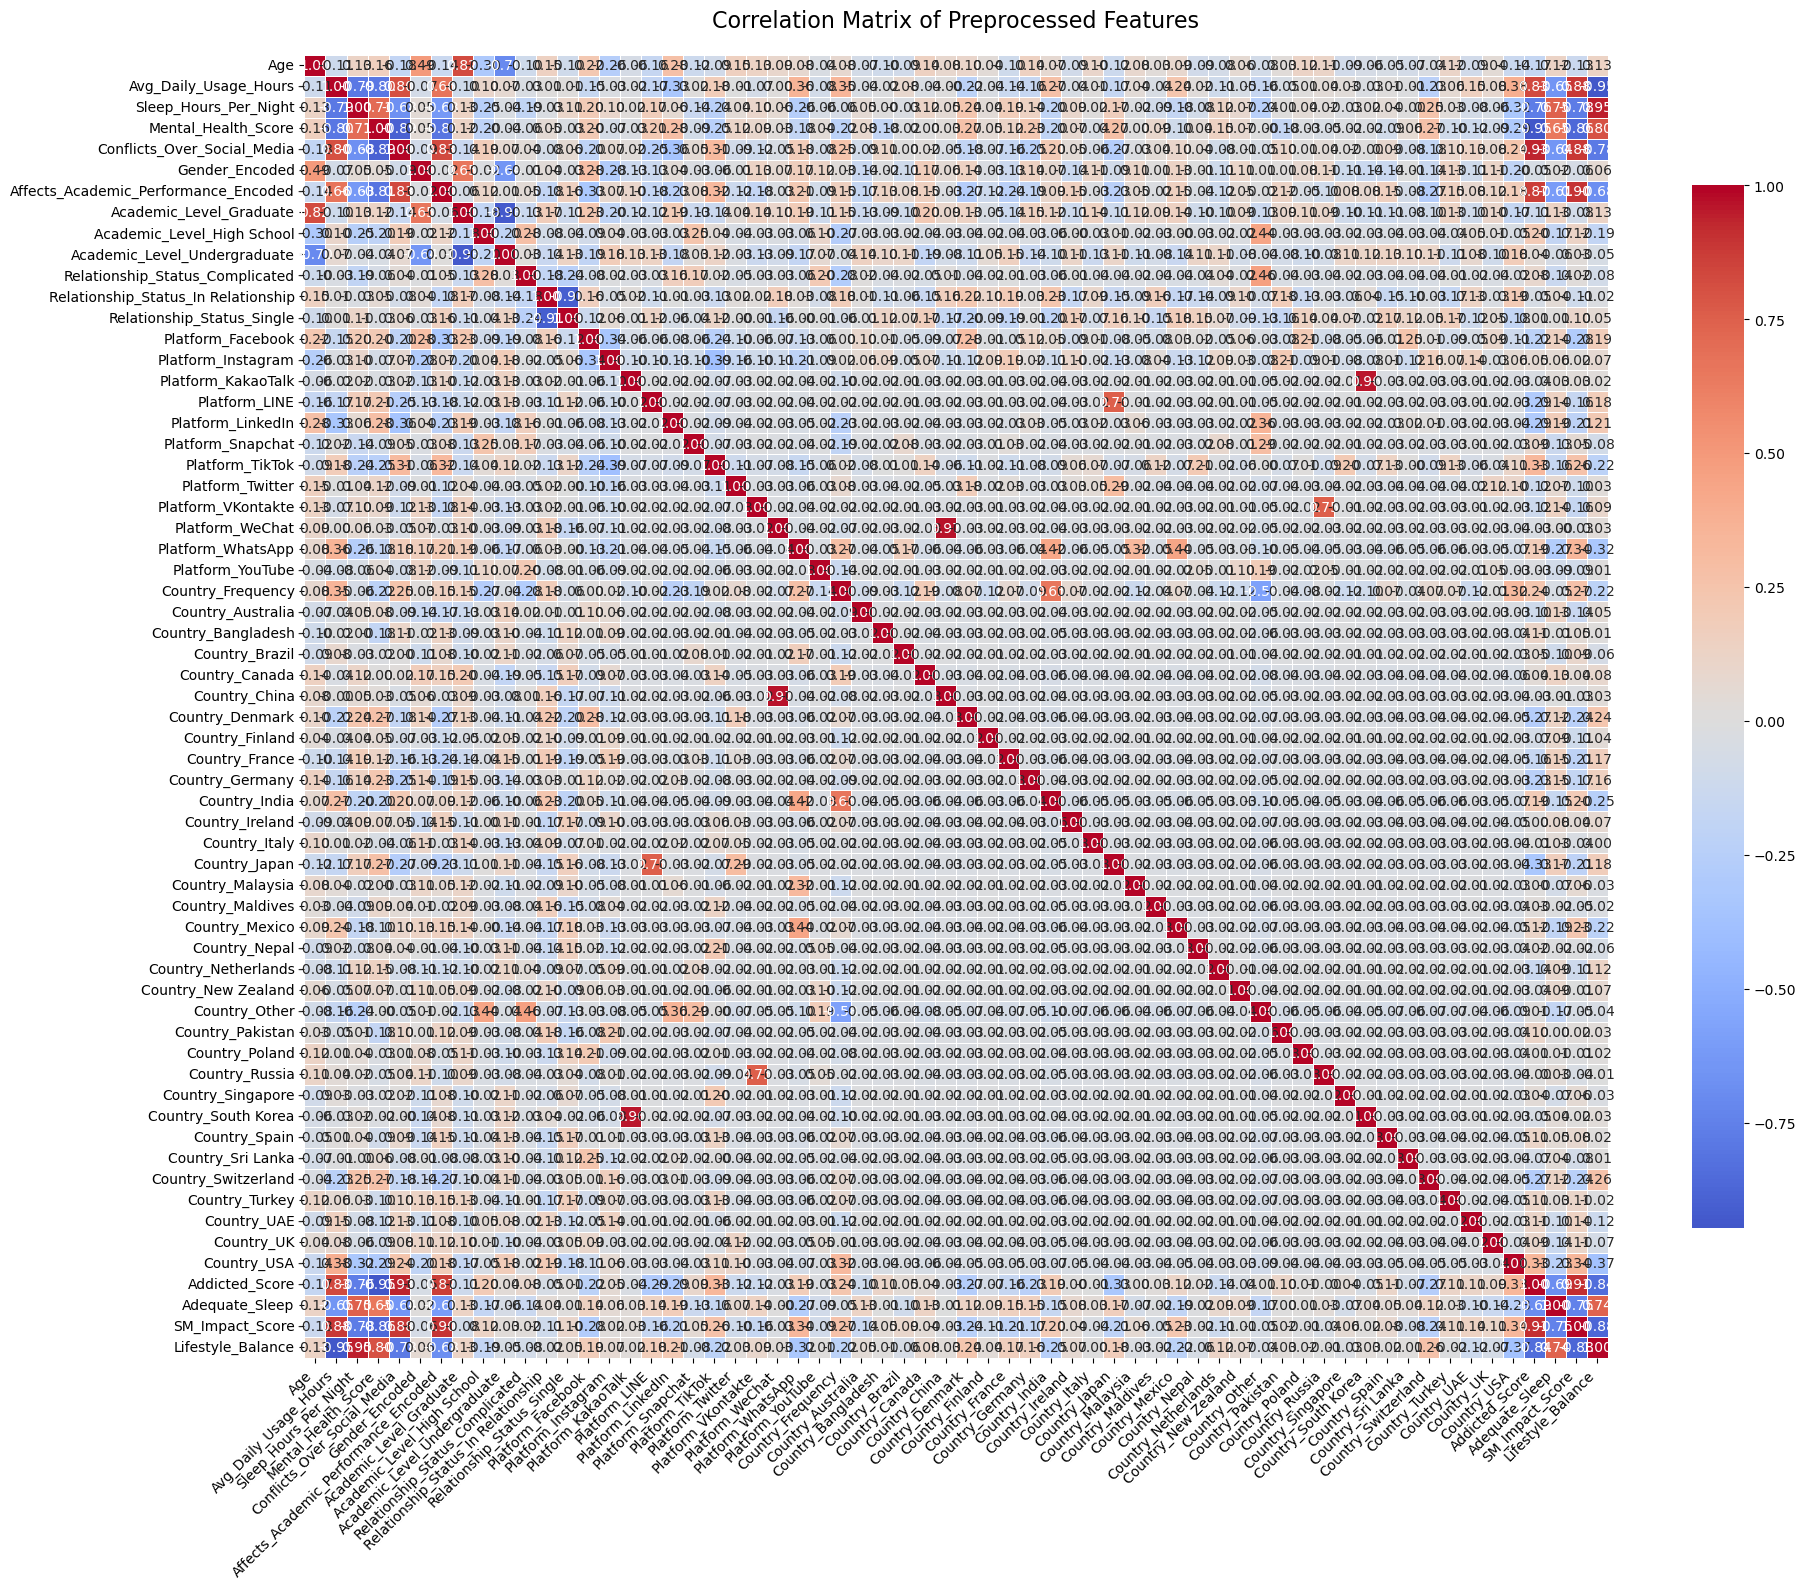


⚠️ Highly correlated feature pairs (>0.8):
Age - Academic_Level_Graduate: 0.821
Avg_Daily_Usage_Hours - Mental_Health_Score: 0.801
Avg_Daily_Usage_Hours - Conflicts_Over_Social_Media: 0.805
Avg_Daily_Usage_Hours - Addicted_Score: 0.832
Avg_Daily_Usage_Hours - SM_Impact_Score: 0.882
Avg_Daily_Usage_Hours - Lifestyle_Balance: 0.946
Sleep_Hours_Per_Night - Lifestyle_Balance: 0.946
Mental_Health_Score - Conflicts_Over_Social_Media: 0.894
Mental_Health_Score - Affects_Academic_Performance_Encoded: 0.809
Mental_Health_Score - Addicted_Score: 0.945
Mental_Health_Score - SM_Impact_Score: 0.865
Conflicts_Over_Social_Media - Affects_Academic_Performance_Encoded: 0.832
Conflicts_Over_Social_Media - Addicted_Score: 0.934
Conflicts_Over_Social_Media - SM_Impact_Score: 0.880
Affects_Academic_Performance_Encoded - Addicted_Score: 0.866
Affects_Academic_Performance_Encoded - SM_Impact_Score: 0.899
Academic_Level_Graduate - Academic_Level_Undergraduate: 0.926
Relationship_Status_In Relationship - Rela

In [28]:
# Create correlation heatmap for final dataset
plt.figure(figsize=(20, 16))

# Calculate correlation matrix
corr_matrix = df_final_preprocessed.corr()

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Preprocessed Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find highly correlated features (absolute correlation > 0.8)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        correlation = abs(corr_matrix.iloc[i, j])
        if correlation > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                correlation
            ))

if high_corr_pairs:
    print("\n⚠️ Highly correlated feature pairs (>0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("\n✅ No highly correlated features found (>0.8)")

print(f"\n📋 PREPROCESSING PIPELINE COMPLETED:")
print(f"🔸 Data properly split into train ({df_engineered.shape[0]} samples) and test ({df_test_engineered.shape[0]} samples)")
print(f"🔸 Scaling applied correctly (fitted on training data only)")
print(f"🔸 Feature engineering completed with proper data leakage prevention")
print(f"🔸 Final dataset ready for machine learning models")